https://scikit-learn.org/stable/

# Supervised Learning

La machine reçoit des données caractérisées par des variables x (features) et annotées d'une variable y (label/target)

Prédire y en fonction des features x

Dataset -> Entrainement -> Modèle

Avec cette méthode, on peut résoudre des problèmes de REGRESSION et de CLASSIFICATION

1 Sélectionner un estimateur et préciser ses hyperparamètres :

model(=objet) = LinearRegression(=Constructeur)(......(=Hyperparamètres))

2 Entrainer le modèle sur les données X,y (divisées en 2 tableaux Numpy) :

model.fit(X,y)

X et y doivent avoir 2 dimensions !
[n_samples, n_features]

3 Evaluer le modèle :

model.score(X,y)

4 utiliser le modèle :

model.predict(X)

choisir le bon estimateur :

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression

In [2]:
np.random.seed(0)
m = 100 #creating 100 samples
X = np.linspace(0,10,m).reshape(m,1)
y = X + np.random.randn(m,1)

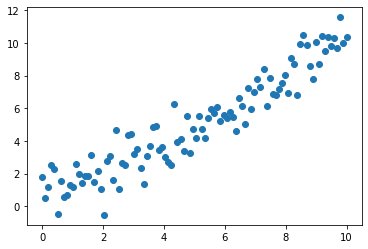

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.linear_model import LinearRegression

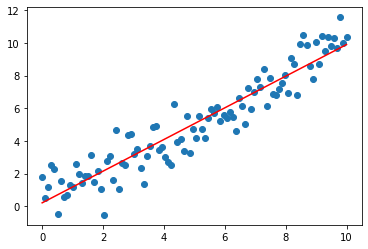

In [5]:
model = LinearRegression()
model.fit(X,y)
model.score(X,y)
predictions = model.predict(X)
plt.scatter(X,y)
plt.plot(X, predictions, c="r")

## Classification KNN

In [6]:
import pandas as pd
import seaborn as sns

In [7]:
titanic = sns.load_dataset("titanic")
titanic.shape
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
titanic = titanic[["survived","pclass","sex","age"]] #autre manière que drop
titanic.dropna(axis=0, inplace=True)
titanic["sex"].replace(["male","female"],[0,1], inplace = True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [9]:
from sklearn.neighbors import KNeighborsClassifier


In [10]:
y = titanic["survived"]
X = titanic.drop("survived", axis=1)
X.head()

,pclass,sex,age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0


## Exercice

3


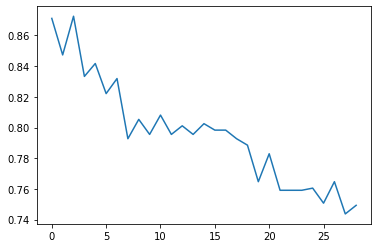

In [11]:
score = []
best_k=1
best_score=0

for k in range(best_k,30):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X,y)
    score.append(model.score(X,y))
    
    if best_score < model.score(X,y):
        best_k=k
        best_score = model.score(X,y)
        
print(best_k)
plt.plot(score)
#mauvaise façon de faire

In [12]:
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X,y)
model.score(X,y) ##correspond à R^2

0.8725490196078431

In [13]:
model.predict(X)

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

In [14]:
def survie(model, pclass=1, sex=0, age=31):
    x = np.array([pclass ,sex ,age]).reshape(1,3) #même ordre que la machine
    print(model.predict(x))
    print(model.predict_proba(x))

In [15]:
survie(model)

[0]
[[0.66666667 0.33333333]]


/Users/rayan/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/rayan/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Train Test Split

3Diviser le dataset en 2 parties :

Train set pour entraîner le modèle

Validation set après l'entraînement

Test set pour évaluer le modèle

### Test set/Train set

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

(150, 4)


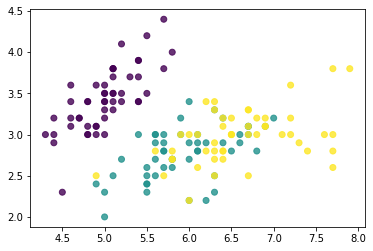

In [17]:
iris = load_iris()
X = iris.data
y = iris.target
print(X.shape)
plt.scatter(X[:,0],X[:,1], c=y, alpha=0.8)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)
#test_size définit le pourcentage de données dans le test set 20% en général
#random_state contrôle l'aléatoire

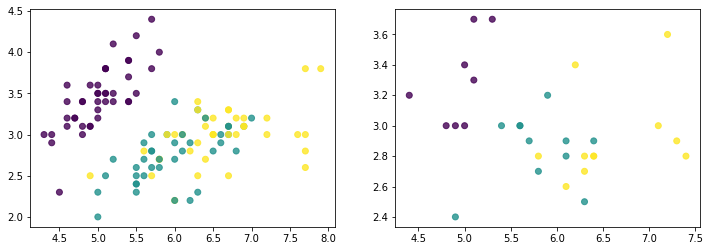

In [19]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.8)
plt.subplot(1,2,2)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.8)

In [20]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
print("Train score", model.score(X_train, y_train))
print("Test score", model.score(X_test, y_test))

Train score 0.975
Test score 0.9333333333333333


## Validation Set

### Cross Validation

Séparer le train set en plusieurs parties

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
cross_val_score(KNeighborsClassifier(n_neighbors=2), X_train, y_train, cv=5, scoring="accuracy").mean()
#cv = nombre de split que l'on veut
#scoring = quel métrique utilisé
#évaluer ensuite en changeant le nombre de voisins proches

0.9666666666666668

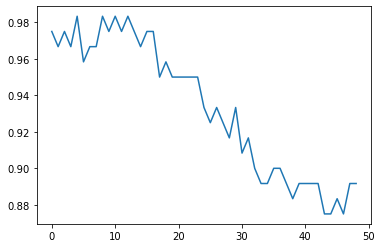

In [23]:
#méthode plus intéressante
val_score = []
for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)
plt.plot(val_score)

### Différentes stratégies 

(150, 4)


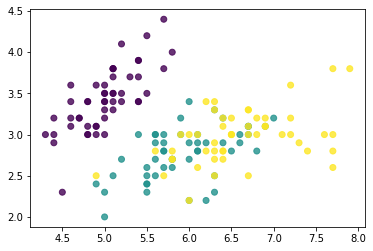

In [24]:
iris = load_iris()
X = iris.data
y = iris.target
print(X.shape)
plt.scatter(X[:,0],X[:,1], c=y, alpha=0.8)

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#### KFold

In [26]:
cv = KFold(5) #5 splits les classes doivent être bien équilibrées !!
cross_val_score(KNeighborsClassifier(),X,y, cv=cv)

array([1.        , 1.        , 0.83333333, 0.93333333, 0.8       ])

#### Shuffle Split

In [27]:
from sklearn.model_selection import ShuffleSplit

In [28]:
cross_val_score(KNeighborsClassifier(),X,y, cv=cv)

array([1.        , 1.        , 0.83333333, 0.93333333, 0.8       ])

#### Stratified KFold
choix par défaut

In [29]:
from sklearn.model_selection import StratifiedKFold

In [30]:
cv = StratifiedKFold(4)
cross_val_score(KNeighborsClassifier(),X,y, cv=cv)

array([0.97368421, 0.94736842, 0.94594595, 1.        ])

#### Group KFold
l'utiliser quand les données dépendent d'un groupe

In [31]:
from sklearn.model_selection import GroupKFold

In [32]:
cv = GroupKFold(5).get_n_splits(X,y, groups=X[:,0]) #définir le groupe dans lequel on travaille
cross_val_score(KNeighborsClassifier(),X,y, cv=cv)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

### Validation curve

pas besoin d'effectuer les étapes d'avant

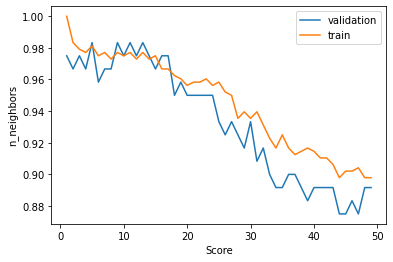

In [33]:
from sklearn.model_selection import validation_curve
model = KNeighborsClassifier()
k= np.arange(1,50)
train_score, val_score = validation_curve(model, X_train, y_train,param_name= "n_neighbors",param_range=k,cv=5)
plt.plot(k,val_score.mean(axis=1), label="validation")
plt.plot(k,train_score.mean(axis=1), label="train")
plt.xlabel("Score")
plt.ylabel("n_neighbors")
plt.legend()

Overfitting : Le modèle s'est trop perfectionné sur le Trainset et a perdu tout sens de généralisation:

    Bon Train set
    
    Mauvais Test set

## GridSearchCV

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = {"n_neighbors":np.arange(1,20),
             "metric": ["euclidean", "manhattan"]
             }
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [36]:
grid.best_score_

0.9833333333333334

In [37]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [38]:
model = grid.best_estimator_

In [39]:
model.score(X_test, y_test)

0.9333333333333333

### Confusion Matrix

évaluer la qualité d'un modèle de classification

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(y_test, model.predict(X_test))
#classe 1 toutes bien rangées
#classe 2 2 ont été mis dans la classe 3 erreur!!
#classe 3 ok!

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]])

## Learning Curve

In [42]:
from sklearn.model_selection import learning_curve

[19 27 36 44 53 61 70 78 87 96]


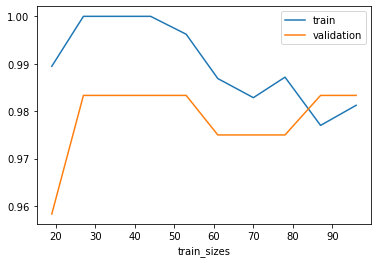

In [43]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.2,1.0,10), cv=5)
print(N) #19 dans le premier lot, 38 le deuxième, ...
plt.plot(N, train_score.mean(axis=1), label="train")
plt.plot(N, val_score.mean(axis=1), label = "validation")
plt.xlabel("train_sizes")
plt.legend()

## Exercice

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [45]:
titanic = sns.load_dataset("titanic")
titanic.shape
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [46]:
titanic = titanic[["survived","pclass","sex","age"]] #autre manière que drop
titanic.dropna(axis=0, inplace=True)
titanic["sex"].replace(["male","female"],[0,1], inplace = True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [47]:
y = titanic["survived"]
X = titanic.drop("survived", axis=1)
X.head()

,pclass,sex,age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [49]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
print("Train score", model.score(X_train, y_train))
print("Test score", model.score(X_test, y_test))

Train score 0.8546409807355516
Test score 0.7482517482517482


In [50]:
param_grid = {"n_neighbors":np.arange(1,20),
             "metric": ["euclidean", "manhattan"]
             }
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [51]:
grid.best_score_

0.7635850495804728

In [52]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 1}

In [53]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.7062937062937062

## Métrique de Régression
https://scikit-learn.org/stable/modules/model_evaluation.html

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *

In [55]:
y = np.array([1,2,2,3,5,2])
y_pred = np.array([5,2,2,5,7,1000])
print("MAE :", mean_absolute_error(y,y_pred))
print("MSE :", mean_squared_error(y,y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y,y_pred)))
print("Median abs err :", median_absolute_error(y,y_pred))

MAE : 167.66666666666666
MSE : 166004.66666666666
RMSE : 407.43670265044443
Median abs err : 2.0


In [56]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

/Users/rayan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housi

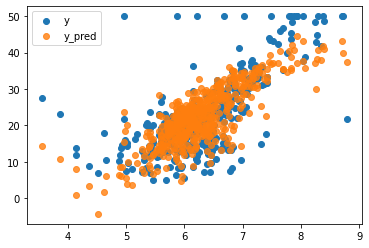

In [57]:
boston = load_boston()
X = boston.data
y = boston.target
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)
plt.scatter(X[:,5],y, label="y")
plt.scatter(X[:,5], y_pred, alpha=0.8, label="y_pred")
plt.legend()

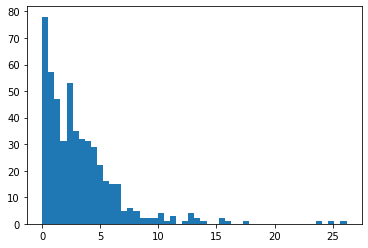

In [58]:
err_hist = np.abs(y-y_pred)
plt.hist(err_hist, bins = 50)
plt.show()

### Coefficient de détermination R2

In [59]:
#évalue la performance du modèle par rapport au niveau de variation présent dans les données
model.score(X,y) #décrit 74% des variations du prix de l'immobilier

0.7406426641094095

In [60]:
cross_val_score(model, X, y,cv=3, scoring="neg_mean_absolute_error")#scoring donne les métriques disponibles

array([ -3.32352337,  -4.27948547, -13.47752829])

## Make Scorer

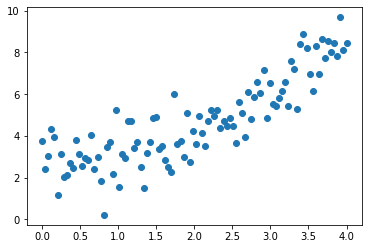

In [61]:
np.random.seed(0)
m=100
X = np.linspace(0,4,m).reshape((m,1))
y = 2 + X**1.3 + np.random.randn(m,1)
y=y.ravel()
plt.scatter(X,y)

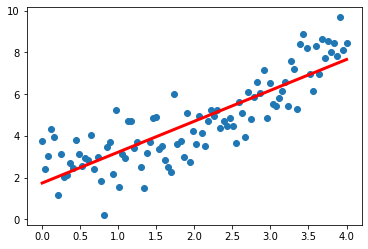

In [62]:
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)
plt.scatter(X,y)
plt.plot(X, y_pred,c="r",lw=3)

In [63]:
mean_absolute_error(y,y_pred)

0.8739397321740953

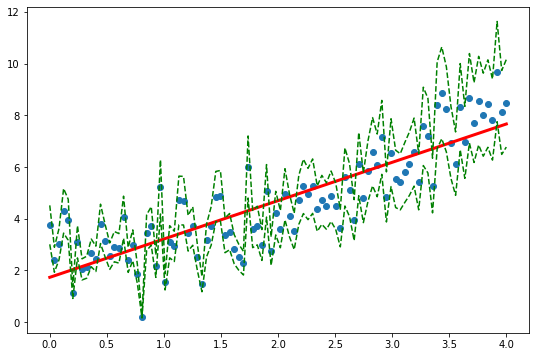

In [64]:
plt.figure(figsize=(9,6))
plt.scatter(X,y)
plt.plot(X,y_pred,c="r",lw=3)
plt.plot(X, y+y*0.2, c="g", ls="--")
plt.plot(X, y-y*0.2, c="g", ls="--")

In [65]:
def custom_metric(y, y_pred):
    return np.sum((y_pred < y+y*0.2) & (y_pred > y-y*0.2))/y.size

custom_metric(y,y_pred) #63% sont ok par rapport à la métric créer
    

0.63

In [66]:
from sklearn.metrics import make_scorer

In [67]:
custom_score = make_scorer(custom_metric, greater_is_better=True)
#plus on s'approche de 1, meilleur il est

In [68]:
cross_val_score(LinearRegression(),X,y,cv=3,scoring=custom_score)

array([0.08823529, 0.42424242, 0.3030303 ])

In [69]:
from sklearn.svm import SVR

In [70]:
model = SVR(kernel="rbf", degree=3)
params = {"gamma":np.arange(0.1,1,0.05)}

grid = GridSearchCV(model, param_grid=params, cv=3, scoring=custom_score)

grid.fit(X,y)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'gamma': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
             scoring=make_scorer(custom_metric))

In [71]:
best_model = grid.best_estimator_

In [72]:
y_pred = best_model.predict(X)
custom_metric(y,y_pred)

0.64

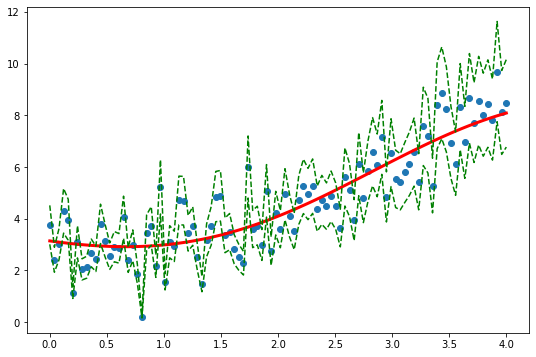

In [73]:
plt.figure(figsize=(9,6))
plt.scatter(X,y)
plt.plot(X,y_pred,c="r",lw=3)
plt.plot(X, y+y*0.2, c="g", ls="--")
plt.plot(X, y-y*0.2, c="g", ls="--")

# Preprocessing
Très important, beaucoup moins précis sans!!!

## Preprocessing Transformers

In [74]:
import numpy as np

### Encodage

#### Label Encoder
pour une colonne à la fois

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
y = np.array(["chat", "chien", "chat", "oiseau"])
encoder = LabelEncoder() 
encoder.fit_transform(y) #transforme en donnée numérique

array([0, 1, 0, 2])

In [77]:
encoder.classes_

array(['chat', 'chien', 'oiseau'], dtype='<U6')

In [78]:
encoder.inverse_transform(np.array([0,0,2,2]))

array(['chat', 'chat', 'oiseau', 'oiseau'], dtype='<U6')

#### Ordinal Encoder
pour plusieurs colonnes à la fois

In [79]:
from sklearn.preprocessing import OrdinalEncoder

In [80]:
X = np.array([["chat", "poils"],
            ["chien", "poils"],
            ["chat", "poils"],
            ["oiseau", "plumes"]])

In [81]:
encoder = OrdinalEncoder()
encoder.fit_transform(X)

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

#### Label Binarizer

In [82]:
from sklearn.preprocessing import LabelBinarizer

In [83]:
y = np.array(["chat", "chien", "chat", "oiseau"]) #1D

In [84]:
encoder = LabelBinarizer(sparse_output=True) #encodage binaire, matrice creuse, bcp de 0
#sparse_output pour avoir la CSR form
encoder.fit_transform(y)

<4x3 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

#### One-Hot Encoder

In [85]:
from sklearn.preprocessing import OneHotEncoder

In [86]:
X = np.array([["chat", "poils"], #2D
            ["chien", "poils"],
            ["chat", "poils"],
            ["oiseau", "plumes"]])

In [87]:
encoder = OneHotEncoder()
encoder.fit_transform(X)

<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

### Normalisation

#### Normalisation MinMax

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
X = np.array([[70],
              [80],
              [120]])

In [90]:
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

#### Standard Scaler

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
X = np.array([[70],
              [80],
              [120]])

In [93]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-0.9258201 ],
       [-0.46291005],
       [ 1.38873015]])

#### Robuste Scaler

In [94]:
from sklearn.preprocessing import RobustScaler

In [95]:
X = np.array([[70],
              [80],
              [120]])

In [96]:
scaler = RobustScaler()
scaler.fit_transform(X)

array([[-0.4],
       [ 0. ],
       [ 1.6]])

In [97]:
from sklearn.datasets import load_iris

<function matplotlib.pyplot.show(close=None, block=None)>

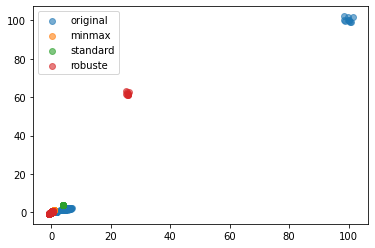

In [98]:
iris = load_iris()
X = iris.data

##Ajout d'outliers
outliers = np.full((10,4),100)+np.random.randn(10,4)
X = np.vstack((X,outliers))

X_minmax = MinMaxScaler().fit_transform(X)
X_stdscl = StandardScaler().fit_transform(X)
X_robust = RobustScaler().fit_transform(X)
plt.scatter(X[:,2], X[:,3], label="original", alpha=0.6)
plt.scatter(X_minmax[:,2], X_minmax[:,3], label="minmax", alpha=0.6)
plt.scatter(X_stdscl[:,2], X_stdscl[:,3], label="standard", alpha=0.6)
plt.scatter(X_robust[:,2], X_robust[:,3], label="robuste", alpha=0.6)
plt.legend()
plt.show

In [99]:
# les méthodes minmaxscaler et standardscaler sont sensibles aux outliers
#solution : Robustscaler

### PolynomialFeatures

In [100]:
from sklearn.preprocessing import PolynomialFeatures

In [101]:
X = np.array([[1],[2],[0.5]])

In [102]:
PolynomialFeatures(3).fit_transform(X)
# x -> c + bx + ax^2

array([[1.   , 1.   , 1.   , 1.   ],
       [1.   , 2.   , 4.   , 8.   ],
       [1.   , 0.5  , 0.25 , 0.125]])

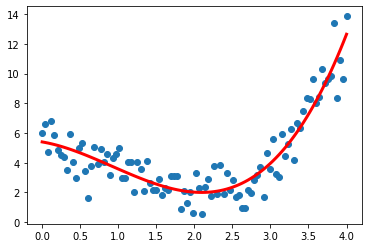

In [103]:
X = np.linspace(0,4,100).reshape((100,1))
y = X**2+ 5*np.cos(X)+ np.random.randn(100,1)

plt.scatter(X,y)

X_poly = PolynomialFeatures(3).fit_transform(X) #le modèle est bcp mieux

model = LinearRegression().fit(X_poly,y)
y_pred = model.predict(X_poly)

plt.plot(X,y_pred, c="r",lw=3)

### Discrétisation

In [104]:
from sklearn.preprocessing import Binarizer, KBinsDiscretizer

In [105]:
X = np.linspace(0,5,10).reshape((10,1))
X

array([[0.        ],
       [0.55555556],
       [1.11111111],
       [1.66666667],
       [2.22222222],
       [2.77777778],
       [3.33333333],
       [3.88888889],
       [4.44444444],
       [5.        ]])

In [106]:
np.hstack((X, Binarizer(threshold=3).fit_transform(X)))
#à partir de 3 ça devient 1, avant 0

array([[0.        , 0.        ],
       [0.55555556, 0.        ],
       [1.11111111, 0.        ],
       [1.66666667, 0.        ],
       [2.22222222, 0.        ],
       [2.77777778, 0.        ],
       [3.33333333, 1.        ],
       [3.88888889, 1.        ],
       [4.44444444, 1.        ],
       [5.        , 1.        ]])

In [107]:
KBinsDiscretizer(n_bins=6).fit_transform(X).toarray() #découper en plus que 2 catégories

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

## Pipeline

In [108]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [109]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y)

model = make_pipeline(StandardScaler(), SGDClassifier())
#permet d'utiliser un transformer et un modèle en m'eme temps
model.fit(X_train,y_train)
model.predict(X_test)


array([1, 2, 0, 0, 2, 2, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 2, 0,
       2, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1])

### Pipeline-GridSearchCV
On peut utiliser GridSearchCV pour trouver les meilleurs paramètres de la pipeline


In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
model = make_pipeline(PolynomialFeatures(),
                      StandardScaler(),
                      SGDClassifier(random_state=0))


params = {
    "polynomialfeatures__degree":[2,3,4],
    "sgdclassifier__penalty": ["l1", "l2"]
}
grid =GridSearchCV(model, param_grid=params, cv=4)

grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [112]:
grid.best_params_

{'polynomialfeatures__degree': 4, 'sgdclassifier__penalty': 'l1'}

In [113]:
grid.score(X_test,y_test)

0.9736842105263158

### Pipeline avancé

In [114]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [115]:
y = titanic["survived"]
X = titanic.drop("survived", axis=1)

In [116]:
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer

In [117]:
#trier les variables catégoriales et numériques :
numerical_features = ["pclass","age","fare"]
categorical_features = ["sex","deck","alone"]
#avec make_column_selector
numerical_features = make_column_selector(dtype_include=np.number)
#toutes les variables de type numérique
categorical_features = make_column_selector(dtype_exclude=np.number)
#tout sauf les nombres

In [118]:
#définir les pipelines pour chaque parties des features
numerical_pipeline = make_pipeline(SimpleImputer(), 
                                   StandardScaler())
#simpleimputer pour enlever les nan
categorical_pipeline = make_pipeline(SimpleImputer(strategy = "most_frequent"),
                                                  OneHotEncoder())

In [119]:
preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                        (categorical_pipeline, categorical_features))

In [120]:
model = make_pipeline(preprocessor, SGDClassifier())
model.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9f082399d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncode

In [121]:
from sklearn.pipeline import make_union

In [122]:
X.dropna(axis=0, inplace=True)
y.dropna(axis=0,inplace=True)
numerical_features = X[["age","fare"]]

In [123]:
pipeline = make_union(StandardScaler(),Binarizer()) #plusieurs transformateurs en même temps

In [124]:
pipeline.fit_transform(numerical_features).shape
#2 premières colonnes :standard
#2 dernières : binarizer

(182, 4)

## Imput

### Simple Imputer

In [4]:
from sklearn.impute import SimpleImputer
import numpy as np

In [5]:
X = np.array([[10,3],
             [0,4],
             [5,3], 
             [np.nan,3]])

In [12]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

#strategy : mean, median, most_frequent, constant
imputer.fit_transform(X)


array([[10.,  3.],
       [ 0.,  4.],
       [ 5.,  3.],
       [ 5.,  3.]])

### KNN Imputer

In [128]:
from sklearn.impute import KNNImputer

In [129]:
X = np.array([[1,100],
             [2,30],
             [3,15], 
             [np.nan,2]])

In [130]:
imputer = KNNImputer(n_neighbors=1)
imputer.fit_transform(X)

array([[  1., 100.],
       [  2.,  30.],
       [  3.,  15.],
       [  3.,   2.]])

### Missing Indicator

In [131]:
from sklearn.impute import MissingIndicator
from sklearn.pipeline import make_union

In [132]:
X = np.array([[1,100],
             [2,30],
             [3,15], 
             [np.nan,np.nan]])

In [133]:
MissingIndicator().fit_transform(X)

array([[False, False],
       [False, False],
       [False, False],
       [ True,  True]])

In [134]:
pipeline = make_union(SimpleImputer(strategy="constant", fill_value = -99),
                     MissingIndicator())
pipeline.fit_transform(X)

array([[  1., 100.,   0.,   0.],
       [  2.,  30.,   0.,   0.],
       [  3.,  15.,   0.,   0.],
       [-99., -99.,   1.,   1.]])

In [135]:
#manque d'info devient une info??

### Application

In [136]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [137]:
titanic = sns.load_dataset("titanic")
X = titanic[["pclass","age"]]
y = titanic["survived"]
X_train, X_test,y_train , y_test = train_test_split(X,y, test_size=0.2)

In [138]:
model = make_pipeline(KNNImputer(), SGDClassifier())

In [139]:
params = {
    "knnimputer__n_neighbors" : [1,2,3,4]
}

In [140]:
grid = GridSearchCV(model, param_grid=params,cv=5)

In [141]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                       ('sgdclassifier', SGDClassifier())]),
             param_grid={'knnimputer__n_neighbors': [1, 2, 3, 4]})

In [142]:
grid.best_params_

{'knnimputer__n_neighbors': 1}

# Feature Selection
Trouver les variables les plus utiles

## Module

### Variance Threshold
Elimine les variables dont la variance est inférieure  au seuil que l'on définit

In [144]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_iris

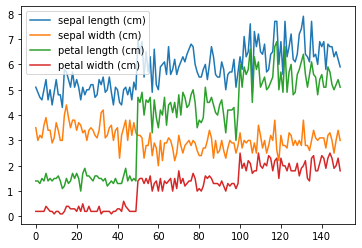

In [148]:
iris = load_iris()
X = iris.data
y = iris.target
plt.plot(X)
plt.legend(iris.feature_names)

In [149]:
X.var(axis=0) #variance de chaque variable

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [153]:
selector = VarianceThreshold(threshold=0.2)
selector.fit_transform(X)
selector.get_support() #indique les variables sélectionnées

array([ True, False,  True,  True])

In [155]:
np.array(iris.feature_names)[selector.get_support()]

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

### SelectKBest
Sélectionne les K variables X dont le score du test de dépendance avec y est le plus élevé

In [156]:
from sklearn.feature_selection import SelectKBest, chi2

In [157]:
chi2(X,y) # 1) plus élevé, plus de dépendance entre X et y
# 2) p values

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

In [160]:
selector = SelectKBest(chi2,k=2) #deux variable uniquement
selector.fit_transform(X,y)
selector.get_support()

array([False, False,  True,  True])

### SelectFromModel
Pré-entrainer un estimateur et examiner ses coefficients pour voir quelles sont les variables les plus importantes

In [162]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier

In [164]:
selector = SelectFromModel(SGDClassifier(random_state=0),
                          threshold="mean")
selector.fit_transform(X,y)
selector.get_support() #deux dernières ont été retenues

array([False, False,  True,  True])

In [166]:
selector.estimator_.coef_ #coeff de SGDClassifier

array([[  8.64029104,  27.2851296 , -40.01819009, -17.73533424],
       [ -5.48888269, -58.79616709,  22.88584985, -54.14457159],
       [-81.28026953, -75.17372078, 130.76437145, 131.39608339]])

In [168]:
selector.estimator_.coef_.mean(axis=0).mean() #moyenne totale
#sélectionne toutes les variables supérieurs à cette valeur

-0.9721175565229512

In [169]:
selector.estimator_.coef_.mean(axis=0)

array([-26.04295373, -35.56158609,  37.87734374,  19.83872585])

### RFE + RFECV
sélectionner des variables de façon récursive

In [172]:
from sklearn.feature_selection import RFE,RFECV

In [180]:
selector = RFECV(SGDClassifier(), step=1,min_features_to_select=2,cv=5)
#step: nbr variable à éliminer à chque itération
#min_features_to_select: cb de variable on veut à la fin
selector.fit(X,y)
selector.ranking_

array([3, 1, 2, 1])

In [178]:
selector.cv_results_ #toutes les infos

{'mean_test_score': array([0.88      , 0.9       , 0.82666667]),
 'std_test_score': array([0.06863753, 0.0760117 , 0.13232955]),
 'split0_test_score': array([0.8, 1. , 0.9]),
 'split1_test_score': array([0.96666667, 0.83333333, 0.96666667]),
 'split2_test_score': array([0.9       , 0.8       , 0.93333333]),
 'split3_test_score': array([0.8       , 0.9       , 0.66666667]),
 'split4_test_score': array([0.93333333, 0.96666667, 0.66666667])}

# Non-Supervised Learning
La machine analyse la structure des données X pour apprendre elle-même à réaliser certaines tâches

## K-Means Clustering
L'effectuer plusieurs fois pour vérifier la position des clusterings. 
On retient la distance minimale

In [217]:
from sklearn.datasets import make_blobs

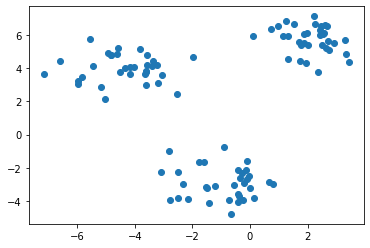

In [218]:
X, y = make_blobs(n_samples=100, centers=3)
plt.scatter(X[:,0],X[:,1])

In [219]:
from sklearn.cluster import KMeans

-170.61029497789744


170.6102949778974

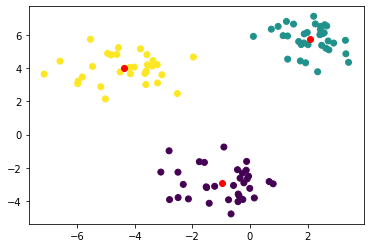

In [220]:
model = KMeans(n_clusters=3) 
model.fit(X)
model.predict(X)
plt.scatter(X[:,0],X[:,1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c="r")
print(model.score(X))
model.inertia_ #équivalent à score

### Elbow Method
Déterminer le nombre de clusters

In [221]:
inertia = []
K_range = range(1,20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

Text(0, 0.5, 'Cout du modele')

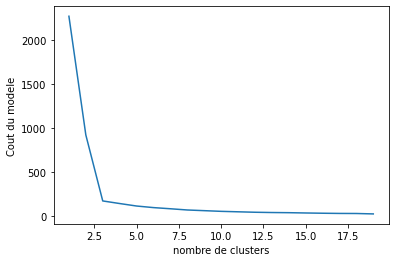

In [222]:
plt.plot(K_range, inertia)
plt.xlabel("nombre de clusters")
plt.ylabel("Cout du modele")

In [223]:
#Il nous faut 3 clusters

## Isolation Forest
Détecte les échantillons dont les caractères X sont très éloignés des autres (anomalies)

Faible nombre de splits = Forte probalité d'une anomalie. Il faut générer plusieurs tests

In [234]:
X,y = make_blobs(n_samples = 50, centers=1)
X[-1,:]=np.array([2.25,5])


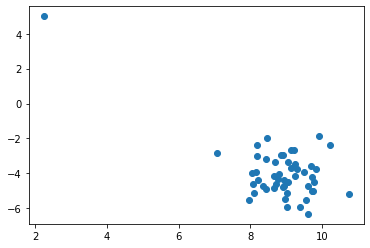

In [235]:
plt.scatter(X[:,0],X[:,1])

In [236]:
from sklearn.ensemble import IsolationForest

In [237]:
model = IsolationForest(contamination=0.01) #on pense qu'il y'a 1% d'anomalie
model.fit(X)

IsolationForest(contamination=0.01)

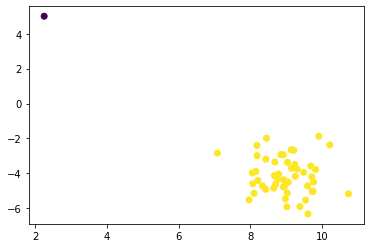

In [238]:
plt.scatter(X[:,0],X[:,1],c=model.predict(X))

### Application

In [239]:
from sklearn.datasets import load_digits

In [241]:
digits = load_digits()
images = digits.images
X = digits.data
y = digits.target
print(X.shape)

(1797, 64)


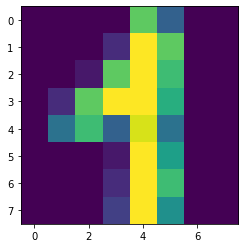

In [243]:
plt.imshow(images[42])
plt.show()

In [244]:
model = IsolationForest(random_state=0,contamination=0.02) #on pense qu'il y'a 2% d'anomalie max 5%
model.fit(X)

IsolationForest(contamination=0.02, random_state=0)

In [246]:
model.predict(X) # 1: normal, -1: anomalie

array([1, 1, 1, ..., 1, 1, 1])

In [249]:
outliers = model.predict(X) == -1
outliers

array([False, False, False, ..., False, False, False])

Text(0.5, 1.0, '2')

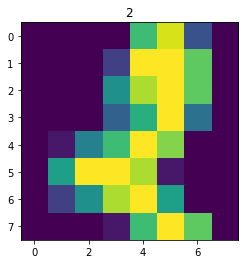

In [255]:
plt.imshow(images[outliers][0]) #anomalie
plt.title(y[outliers][0])

## PCA
Réduire la complexité superflue d'un dataset en projetant ses données dans un espace de plus petite dimension (moins de variables)

1) Accélère l'apprentissage

2) Lutte contre l'overfitting

In [256]:
from sklearn.decomposition import PCA

In [258]:
# Comment choisir le nbr de composents ?
# 1) Visualisation de données : 2 ou 3
# 2) Compression de données : choisir pour concerver 95-99% de la variance des données  

In [259]:
X.shape #dataset digits

(1797, 64)

### Visualisation de données

In [261]:
model = PCA(n_components = 2)
X_reduced = model.fit_transform(X)

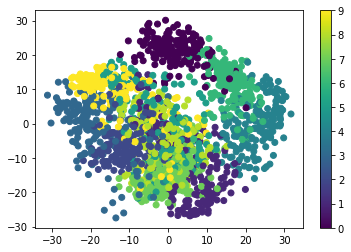

In [264]:
plt.scatter(X_reduced[:,0],X_reduced[:,1], c=y) #y contient les étiquettes de nos différents chiffres, 1,2,3,4,5,6,7,8,9
plt.colorbar()

In [266]:
model.components_.shape #chaque composente est une composition linéaire de toutes les variables

(2, 64)

### Compression de données

In [306]:
model = PCA(n_components=64) #64=le maximum, on peut direct écrire 0.95 de variance conservé
X_reduced = model.fit_transform(X)

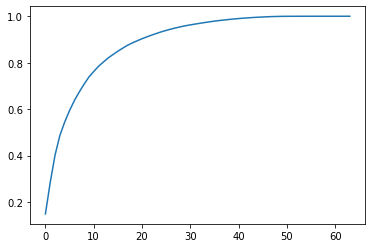

In [307]:
plt.plot(np.cumsum(model.explained_variance_ratio_))

In [308]:
# On cherche à savoir le nbr de component tout en ayant 95-99% de variance conserver
np.argmax(np.cumsum(model.explained_variance_ratio_)>0.99)
#A partir de 40 on atteind 99%

40

In [309]:
model = PCA(n_components=40) #40=99% conservé
X_reduced = model.fit_transform(X)

In [310]:
X_recovered = model.inverse_transform(X_reduced)

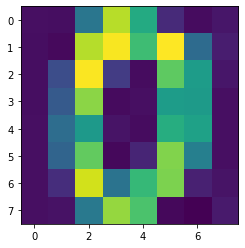

In [311]:
plt.imshow(X_recovered[0].reshape((8,8)))

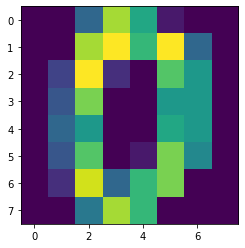

In [312]:
plt.imshow(images[0])

# Ensemble Learning

In [332]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

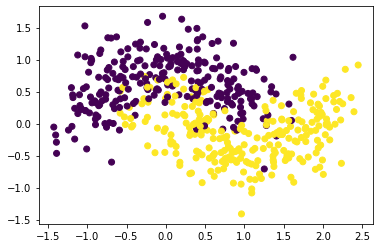

In [333]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=0)
plt.scatter(X[:,0],X[:,1], c=y)

In [334]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

## Bagging
créer plusieurs copies d'un modèle en entrainant chque copiesur une partie aléatoire du dataset

en cas d'overfitting

In [335]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [338]:
model = BaggingClassifier(base_estimator=KNeighborsClassifier(),
                         n_estimators=100) #par défaut
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8933333333333333

In [341]:
model = RandomForestClassifier(n_estimators=100)
#taille max des arbres
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.88

## Voting classifier
Pas très efficace

In [331]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import VotingClassifier

In [330]:
model_1 = SGDClassifier(random_state=0)
model_2 = DecisionTreeClassifier(random_state=0)
model_3 = KNeighborsClassifier(n_neighbors=2)

model_4 = VotingClassifier([("SGD",model_1),
                            ("Tree",model_2),
                           ("KNN", model_3)],
                          voting="hard")
#deux modes : soft ou hard voting (soft de préférence)
for model in(model_1,model_2,model_3, model_4):
    model.fit(X_train, y_train)
    print(model.__class__.__name__,model.score(X_test,y_test))

SGDClassifier 0.84
DecisionTreeClassifier 0.86
KNeighborsClassifier 0.86
VotingClassifier 0.8733333333333333


## Boosting
Les erreurs du 1er modèle sont corrigés par le second modèle etc,... faiblesses compensé par les forces des autres

en cas d'underfitting

In [342]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [343]:
model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.88

In [344]:
model= GradientBoostingClassifier(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8933333333333333

## Stacking
Au lieu de rassembler les prédictions de chaque modèle, on demande à un dernier estimateur d'apprendre à prédire ke résultat final en fonction de ces prédictions

In [345]:
from sklearn.ensemble import StackingClassifier

In [359]:
model = StackingClassifier([('SGD', model_1),
                            ('Tree', model_2),
                            ('KNN', model_3)],
                             final_estimator=KNeighborsClassifier())

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8666666666666667